<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/ISE_PCA_syringes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading all necessary libraries to start the analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Dane pomidoryEJ3d.csv to Dane pomidoryEJ3d.csv


### Read a csv file (from the same folder as the Jupyter notebook) and make a pandas dataframe out of it

In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Dane pomidoryEJ3d.csv']),delimiter=';')

#### Show the dataframe

In [6]:
data


,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,A- 3 (ClO-),NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,A- 3 (ClO-)/g,M
0,Daktyle,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.057018,0.002363,0.040896,0.050755,0.002831,0.059000,0.052790
1,Daktyle,1,1,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.056111,0.001785,0.042695,0.052439,0.000054,0.057324,0.052790
2,Daktyle,1,1,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,0.056470,-0.002705,0.039837,0.052399,-0.002033,0.056118,0.052790
3,barszcz diluted 45mlH2O5ml,2,2,1,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,-0.016569,0.018991,-0.025790,-0.017516,0.017514,-0.080985,0.051154
4,barszcz diluted 45mlH2O5ml,2,2,2,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,-0.014762,0.018885,-0.025828,-0.018449,0.015818,-0.076192,0.051154
5,barszcz diluted 45mlH2O5ml,2,2,3,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,-0.012536,0.023850,-0.026117,-0.018555,0.015969,-0.070075,0.051154
6,Tarczyn pikantny,3,3,1,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.044800,0.013696,0.036756,0.041368,0.013792,0.041708,0.063942
7,Tarczyn pikantny,3,3,2,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.046211,0.015298,0.036688,0.042073,0.014737,0.045469,0.063942
8,Tarczyn pikantny,3,3,3,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.046289,0.014268,0.037570,0.042224,0.013817,0.043829,0.063942
9,tymbark klasyczny E190127,4,3,1,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.047045,0.014777,0.036836,0.042851,0.013724,0.043176,0.063942


In [79]:
X = data.iloc[:,5:18].values
X

array([[ 5.98536900e-02,  5.75878340e-02,  6.50354370e-02,
         5.75191440e-02,  5.14460000e-02,  7.82372570e-02,
         7.26124860e-02,  5.70177570e-02,  2.36292800e-03,
         4.08958000e-02,  5.07547620e-02,  2.83133600e-03,
         5.89995560e-02],
       [ 5.78571970e-02,  5.62535960e-02,  6.53637570e-02,
         5.75793480e-02,  5.22270000e-02,  7.80455370e-02,
         7.07653110e-02,  5.61105670e-02,  1.78540100e-03,
         4.26950450e-02,  5.24389210e-02,  5.42364000e-05,
         5.73243400e-02],
       [ 5.84847300e-02,  5.54285500e-02,  6.47382760e-02,
         5.70051440e-02,  5.25016710e-02,  7.60545730e-02,
         7.11578860e-02,  5.64703480e-02, -2.70517400e-03,
         3.98372530e-02,  5.23985590e-02, -2.03258800e-03,
         5.61184420e-02],
       [ 3.83119010e-02,  3.92115770e-02,  1.91931050e-02,
         1.15434280e-02,  6.91414000e-03,  5.97569870e-02,
         6.16167750e-02, -1.65687680e-02,  1.89907940e-02,
        -2.57904300e-02, -1.75163210e

### Basic Exploratory analysis of the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nazwa próbki    48 non-null     object 
 1   Kod             48 non-null     int64  
 2   Rodzaj próbki   48 non-null     int64  
 3   Powtórzenie     48 non-null     int64  
 4   Nazwa kodowana  48 non-null     object 
 5   DB 5            48 non-null     float64
 6   DB 4            48 non-null     float64
 7   V5              48 non-null     float64
 8   V5_2?           48 non-null     float64
 9   V1              48 non-null     float64
 10  K+ 3            48 non-null     float64
 11  K+ 5            48 non-null     float64
 12  A- 3 (ClO-)     48 non-null     float64
 13  NH4+ 3          48 non-null     float64
 14  A5-(Cl-)        48 non-null     float64
 15  A-10(Cl-)       48 non-null     float64
 16  NH4+ 2          48 non-null     float64
 17  A- 3 (ClO-)/g   48 non-null     float

In [10]:
data.describe()

,Kod,Rodzaj próbki,Powtórzenie,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,A- 3 (ClO-),NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,A- 3 (ClO-)/g,M
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,8.500000,4.062500,2.000000,0.017151,0.022987,0.030666,0.021791,0.016372,0.044209,0.041132,0.057558,-0.016224,0.059514,0.062743,-0.018636,0.052805,0.043982
std,4.658554,1.803144,0.825137,0.045109,0.037147,0.040511,0.043504,0.042641,0.042901,0.041379,0.031780,0.048067,0.048654,0.043412,0.050314,0.042758,0.026398
min,1.000000,1.000000,1.000000,-0.102683,-0.076903,-0.072166,-0.084296,-0.083341,-0.056932,-0.062539,-0.016569,-0.122953,-0.026117,-0.018555,-0.126532,-0.080985,0.000179
25%,4.750000,3.000000,1.000000,0.016879,0.027333,0.020718,0.011312,0.007739,0.043653,0.044163,0.044804,-0.030687,0.036053,0.041584,-0.031455,0.043071,0.022188
50%,8.500000,3.000000,2.000000,0.037566,0.039723,0.052173,0.045121,0.040116,0.066310,0.061844,0.047136,0.012309,0.040597,0.044141,0.012553,0.046577,0.057087
75%,12.250000,6.000000,3.000000,0.040874,0.042762,0.053826,0.047651,0.042453,0.069354,0.064442,0.064650,0.015419,0.067709,0.077048,0.014312,0.062717,0.063942
max,16.000000,7.000000,3.000000,0.059854,0.057588,0.065364,0.057579,0.052502,0.081962,0.072612,0.138603,0.025175,0.162613,0.162539,0.021201,0.135940,0.076730


#### A normally distribuited data has a skewness close to zero.

#### Positive skew

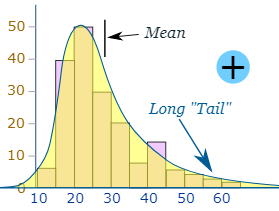

#### Negative skew

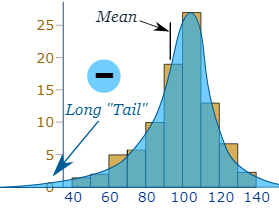

In [11]:
data.skew()

<ipython-input-11-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Kod               0.000000
Rodzaj próbki     0.311805
Powtórzenie       0.000000
Nazwa kodowana    0.000000
DB 5             -1.580292
DB 4             -1.642463
V5               -1.478423
V5_2?            -1.523792
V1               -1.504369
K+ 3             -1.464459
K+ 5             -1.566466
A- 3 (ClO-)       0.328933
NH4+ 3           -1.280083
A5-(Cl-)          0.863680
A-10(Cl-)         0.739395
NH4+ 2           -1.305236
A- 3 (ClO-)/g    -1.200554
M                -0.703929
dtype: float64

### We can also plot data for each variable as a histogram to visualize the data distribution for each feature

<ul>
<li>What is the distribution for each variable</li>
<li>What is the symmetry, frequency</li>
<li>Identify outliers</li>
</ul>

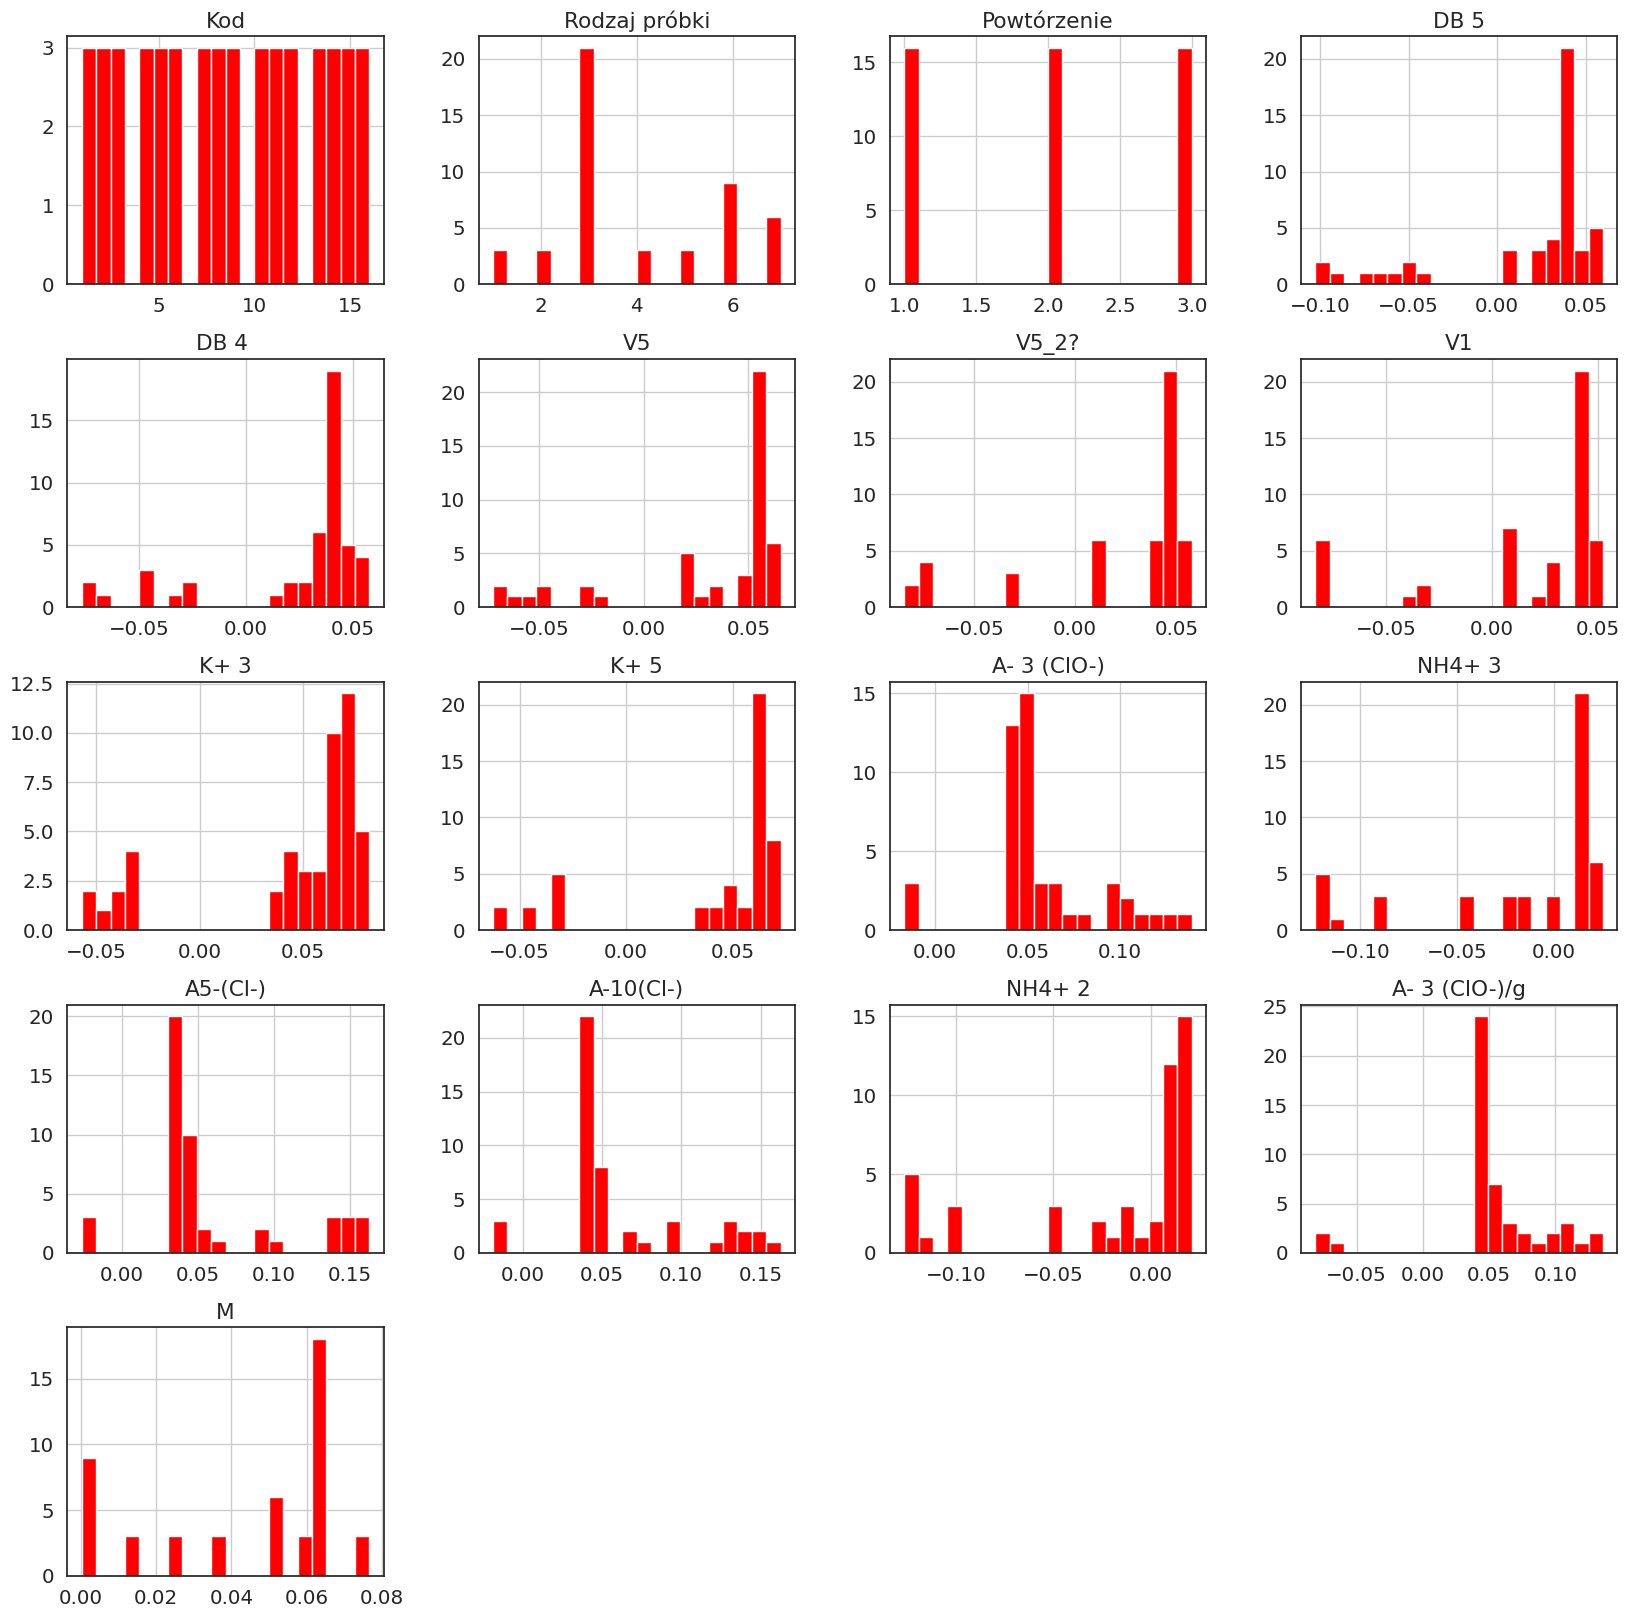

In [12]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='red' )

### Let us check how the data will look like after preprocessing.

In [69]:
from sklearn.preprocessing import StandardScaler, normalize;

# Scaling the data so that all the features become comparable
sc = StandardScaler();
data_sc = sc.fit_transform(X);

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
data_sc_normalized = normalize(X)

# Converting the numpy array into a pandas DataFrame
df_sc_normalized = pd.DataFrame(X)
df_sc = pd.DataFrame(X)

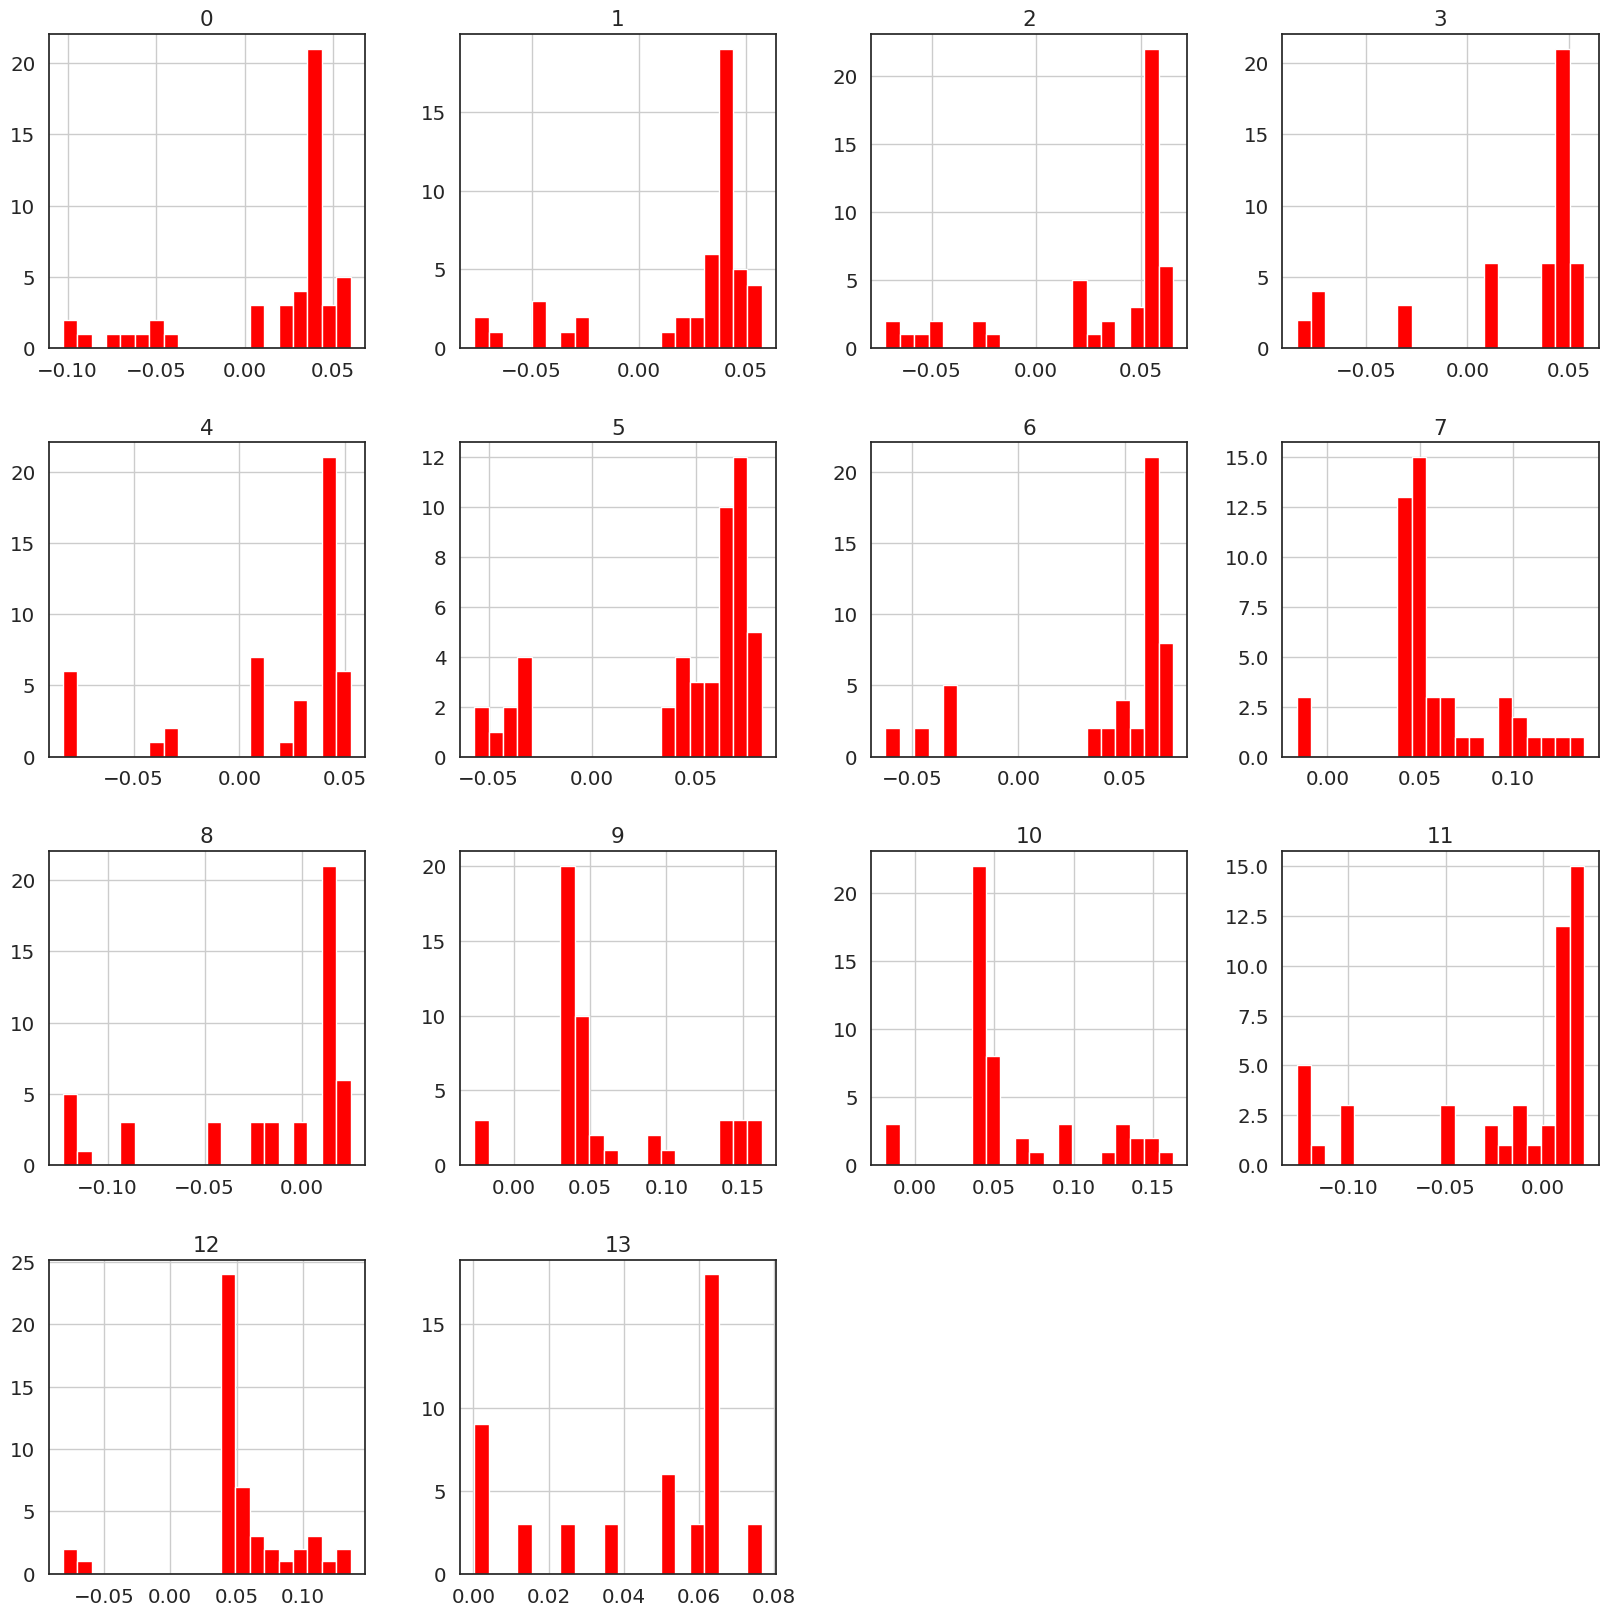

In [14]:
dfdata_sc = pd.DataFrame(data_sc)
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax1=df_sc.hist(bins=20,color='red' )

## k-means

Here we run k-means with different number of clusters from 1 to 13, because we have 13 variables, if you will apply this to other data you can change the max number

### Random initialization

Inertia is the measure of internal coherence of clusters. The algorithm is initialized (new "seeds" or starting points chosen) many times (default 10) and the one with the best inertia is saved.

In [15]:
ints=[]
for i in range(1, 10):
    kmeans=KMeans(n_clusters=i,init="random", n_init=10)
    kmeans.fit(X)
    ints.append(kmeans.inertia_)

### Elbow plot

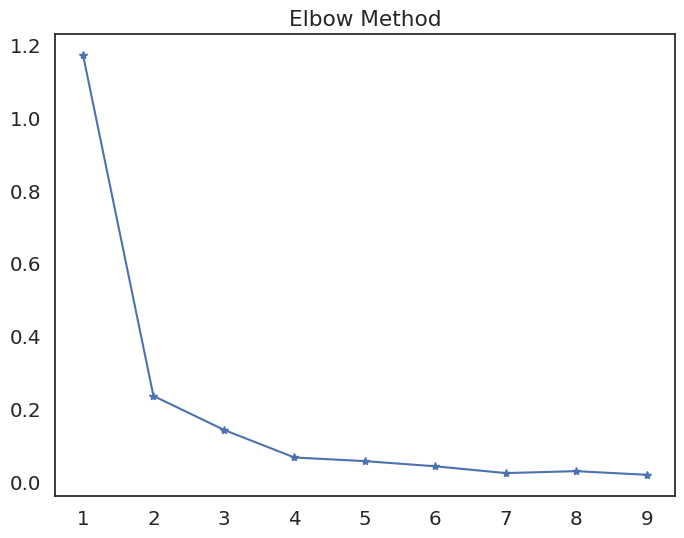

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1,10),ints, marker="*")
plt.title("Elbow Method")
plt.show()

### K-means++ initialization

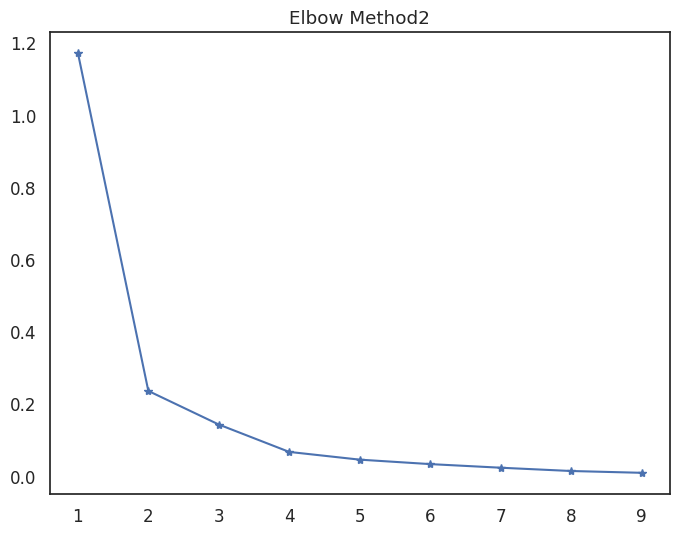

In [64]:
ints=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++", n_init=5)
    kmeans.fit(df_sc)
    ints.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8,6))
plt.plot(range(1,10),ints, marker="*")
plt.title("Elbow Method2")
plt.show()

### Choose the number of clusters based on the elbow plot (e.g. 4) and run KMeans again

In [70]:
kmeans=KMeans(n_clusters=4,init="k-means++", n_init=10)
kmeans.fit(df_sc)
ints.append(kmeans.inertia_)

### Show cluster label for each sample

In [71]:
label = kmeans.fit_predict(df_sc)
print(label)

[3 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 3 3 3 3 3 3]


In [72]:
import pandas as pd
df1 = pd.DataFrame(label)
df1

,0
0,3
1,3
2,3
3,0
4,0
5,0
6,3
7,3
8,3
9,3


... not very impressive for a visualization isn't it? Let us try PCA for visualization

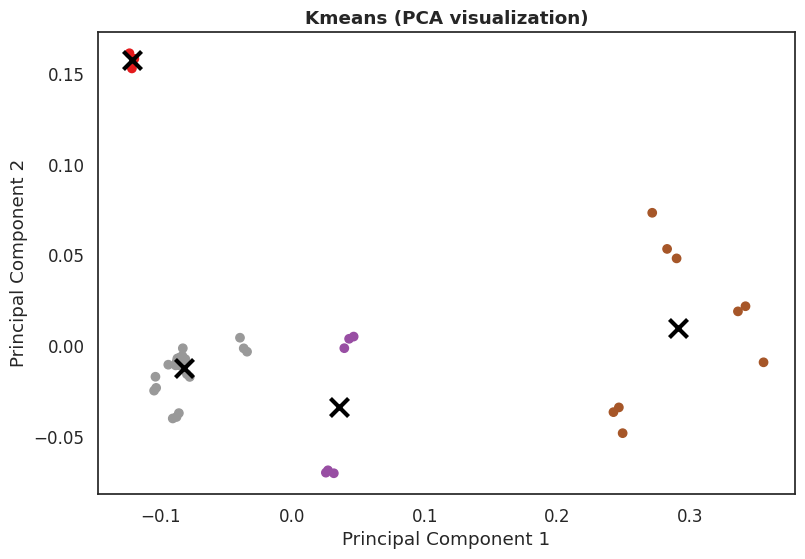

In [73]:
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df_sc)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=label, cmap='Set1')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Kmeans (PCA visualization)',fontweight='bold')
plt.show()

## Hierarchical Clustering

### Hierarchical clustering using scipy

To choose linkage type paste one of those in the parenthesis: 'single' 'complete' 'average' 'ward'

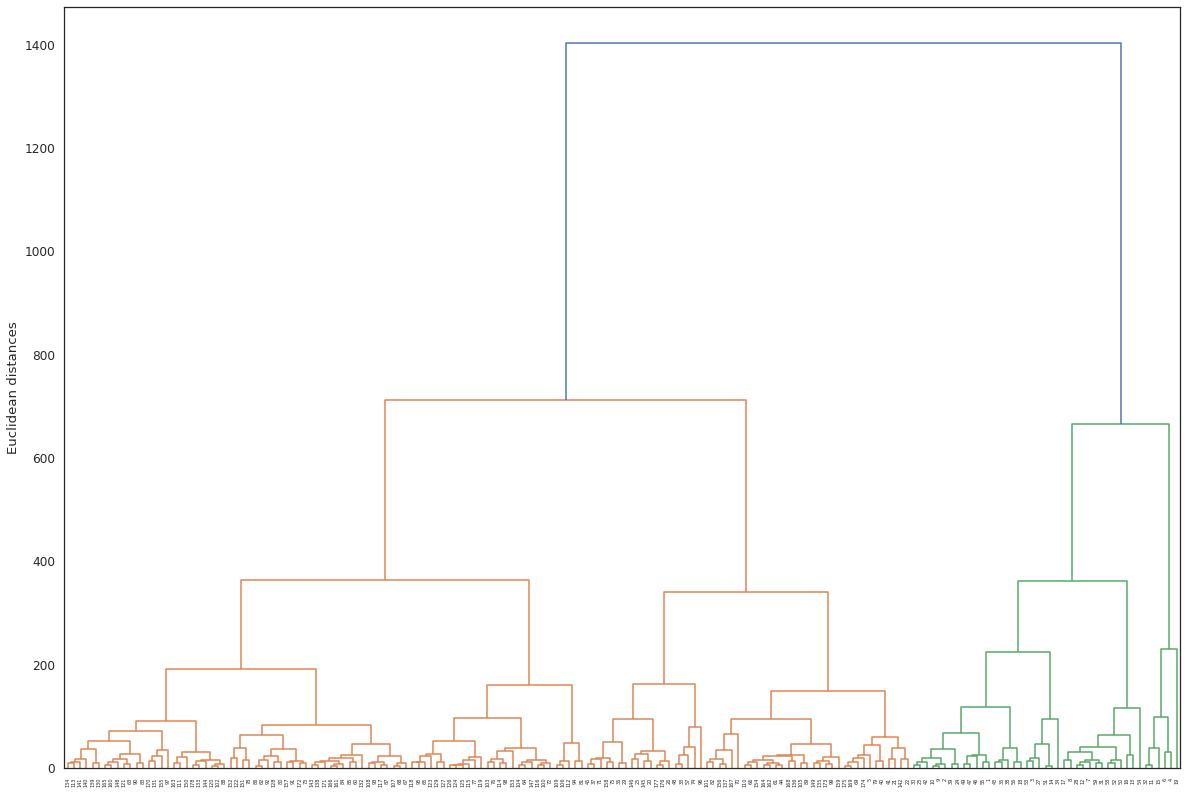

In [ ]:
linked = linkage(data, 'complete')

labelList = list(range(1,179))


plt.figure(figsize=(20,14))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.ylabel('Euclidean distances')
plt.show()

It is computed with euclidean distance, but it can be easily change to any other e.g. 'mahalanobis', 'cosine', 'cityblock', 'chebyshev'. For more info visit the library page https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

Lets add a distance parameter and try Manhattan/Cityblock

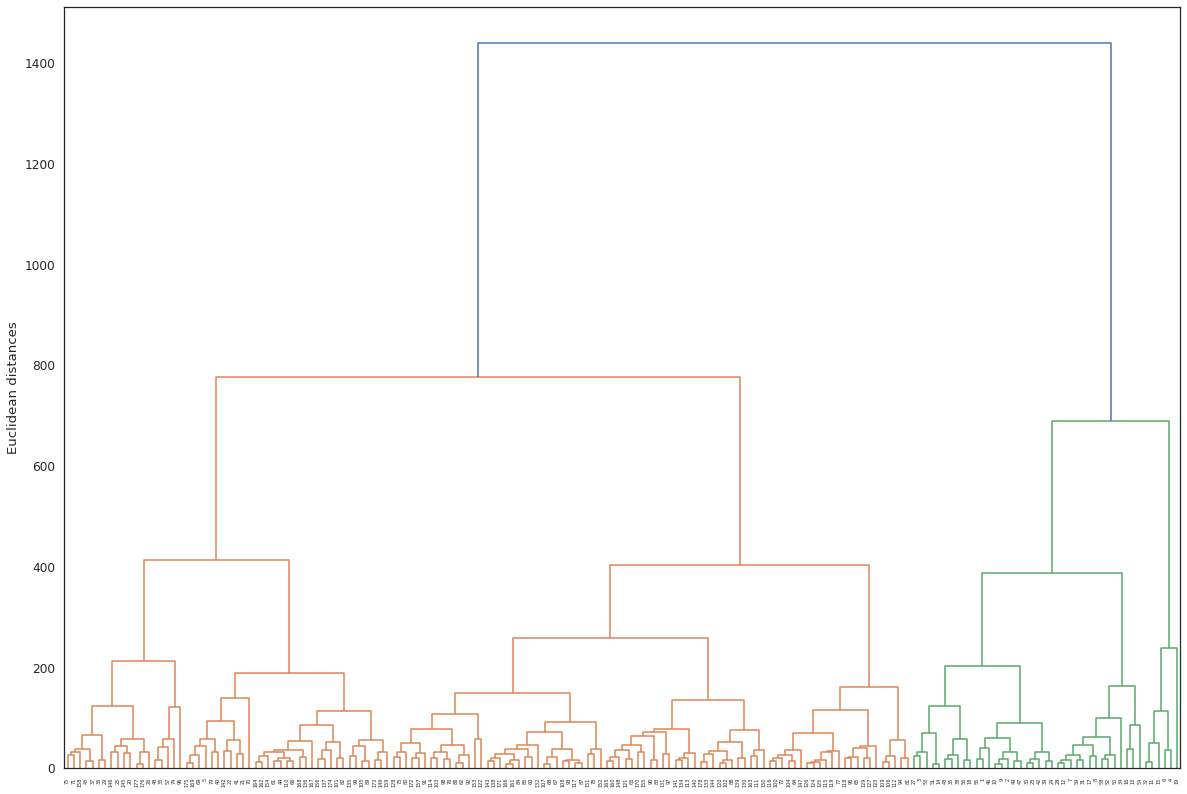

In [ ]:
linked = linkage(data, 'complete', 'cityblock')

labelList =list(range(1, 179))


plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.ylabel('Euclidean distances')
plt.show()

### Hierarchical clusters using sklearn

Here is a more complex code that allows us to visualize only selected number of levels, if you want to see more levels just change the p parameter (now set as p=3)

Here an agglomeration algorithm from sklearn is used, and similarly to the example above we can also change the distance type e.g. "cosine", "euclidean", "cityblock" and the type of linkage e.g. "ward", "complete", "average", "single"

Again more examples in the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


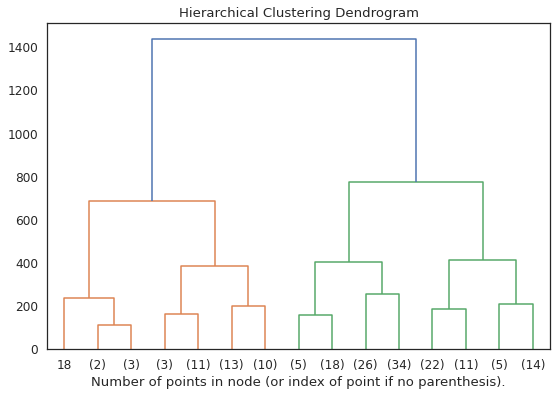

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete", affinity="cityblock")

model = model.fit(data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## PCA Principal Component Analysis

The number of components cannot be greater than the number of variables.
As data you should use scaled or normalized data, but you can play also with the original data set to see how it changes.

In [74]:
pca = PCA(n_components=13)
pca.fit(data_sc)

PCA(n_components=13)

Let us plot how much information is given by each component

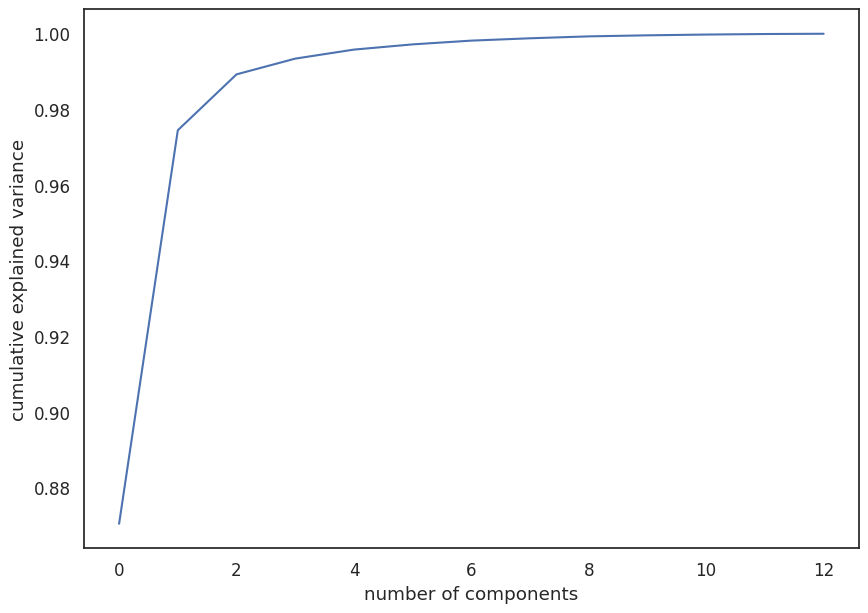

In [75]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [76]:
pca.explained_variance_ratio_

array([8.70420080e-01, 1.04022835e-01, 1.47738852e-02, 4.15973384e-03,
       2.38548056e-03, 1.37988961e-03, 9.93603158e-04, 6.17478784e-04,
       5.06208272e-04, 2.75834986e-04, 2.03409873e-04, 1.42012966e-04,
       7.07138384e-05])

Now we can analyze the loadings plot

<ipython-input-77-b17630fd69c7>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')


IndexError: ignored

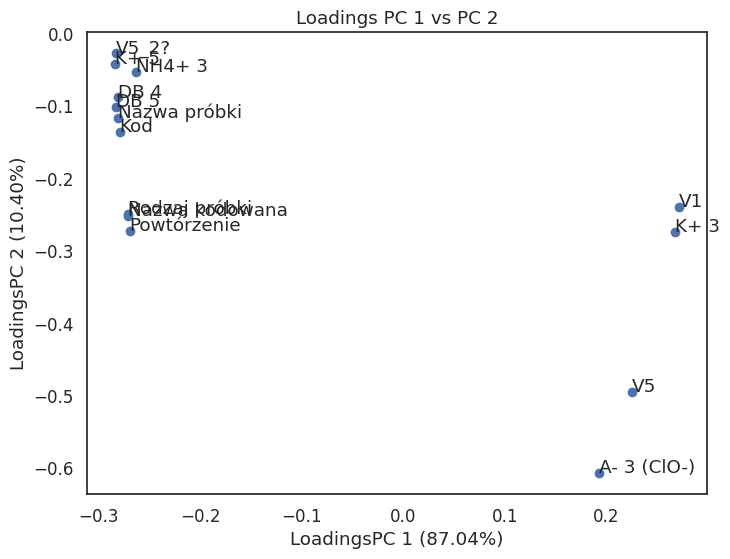

In [77]:
name = data.columns[:]
plt.figure(figsize=(8,6))
plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')
plt.title('Loadings PC 1 vs PC 2')
plt.xlabel('LoadingsPC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('LoadingsPC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name):
    plt.annotate(txt, (pca.components_[0,:][i],pca.components_[1,:][i]))
plt.colorbar();

Finally we can plot Scores, that is our data in the new dataspace

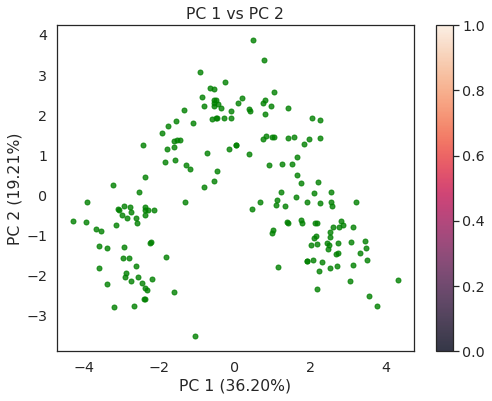

In [ ]:
x_pca = pca.transform(data_sc)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='Set1', s = 100, color = 'green',
            alpha = 0.8, marker = '.')
plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))

plt.colorbar();

If you want you can drop some column that you think is interfering with the analysis.
Remeber to repeat the analysis after this step, starting with the preprocessing

In [ ]:
data_dropped=data.drop('Ash', axis=1)

Or we can color the datapoints according to some column, to help to visualize it better. You can also include some cathegory column in your dataset but remember not to include it in the analysis and just use for visualization.

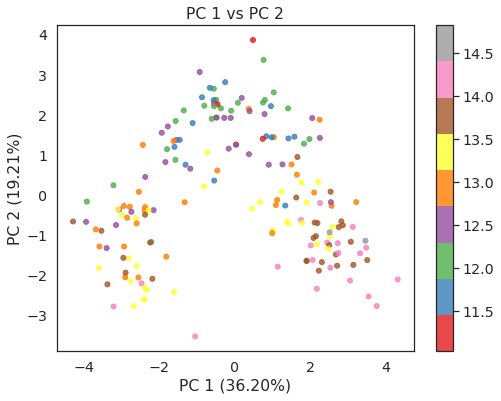

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='Set1', s = 100,  c=data['Alcohol'], alpha = 0.8, marker = '.')

plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
plt.colorbar();

# t-SNE
Here we will implement t-SNE, you can play with

perplexity -how many neighbours are taken into account

n_components -dimensionality of the new space

early_exaggeration -the bigger the parameter the further the clusters will appear visually in the new space

More parameters on https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [ ]:
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=30, verbose=1, random_state=123)
projections = tsne.fit_transform(data_sc)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.002s...
[t-SNE] Computed neighbors for 178 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.115416
[t-SNE] KL divergence after 250 iterations with early exaggeration: 205.288330
[t-SNE] KL divergence after 1000 iterations: 0.594277


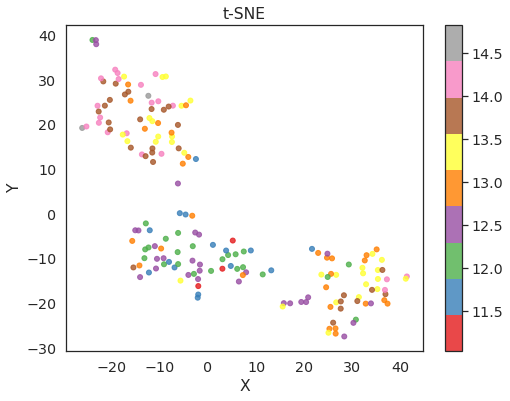

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(projections[:,0],projections[:,1],cmap='Set1', s = 100,  c=data['Alcohol'], alpha = 0.8, marker = '.')

plt.title('t-SNE')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();